In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [226]:
house_data = pd.read_csv('house_data.csv')

In [227]:
house_data.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [228]:
house_data = house_data.drop(columns=['page_url','Unnamed: 0','agency','agent'])

In [229]:
house_data

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,10890.000
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,26136.096
168442,17355249,680,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,2178.008
168443,17355250,6757,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,26136.096
168444,17355251,6752,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,21235.578


In [254]:
karachi_properties = house_data[(house_data['city'] == 'Karachi') & (house_data['location']=='Bahria Town Karachi')&
                                (house_data['purpose'] == 'For Sale')]
khi_prop_sale = karachi_properties.drop(columns=['location','city','purpose','province_name','property_id','location_id','date_added','latitude','longitude'])

In [255]:
khi_prop_sale

,property_type,price,baths,bedrooms,Total_Area
353,Flat,6000000,2,0,11434.542
354,Flat,6200000,0,2,11434.542
356,House,20000000,3,3,2178.008
357,House,14500000,5,5,3811.514
360,House,21000000,3,3,2178.008
...,...,...,...,...,...
168436,House,8800000,4,3,2178.008
168437,House,5000000,4,3,1361.255
168438,House,14000000,3,3,2178.008
168439,House,14000000,4,4,3811.514


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [257]:
x = khi_prop_sale.drop(columns=['price','property_type'])
y = khi_prop_sale['price']

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [259]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [260]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [261]:
linear_reg_pred = linear_reg_model.predict(x_test)
random_forest_pred = random_forest_model.predict(x_test)

In [262]:
# Calculate MSE for both models
mse_linear_reg = mean_squared_error(y_test, linear_reg_pred)
mse_random_forest = mean_squared_error(y_test, random_forest_pred)

print("Linear Regression Mean Squared Error:", mse_linear_reg)
print("Random Forest Mean Squared Error:", mse_random_forest)

Linear Regression Mean Squared Error: 29917358487755.12
Random Forest Mean Squared Error: 14294926204041.652


In [67]:
city_mapping = {'Islamabad': 0, 'Lahore': 1, 'Faisalabad': 2, 'Rawalpindi': 3, 'Karachi': 4}
house_data['city'] = house_data['city'].map(city_mapping)

In [68]:
property_mapping = {'Flat': 0, 'House': 1, 'Penthouse': 2, 'Farm House': 3, 'Lower Portion': 4, 'Upper Portion': 5, 'Room': 6}
house_data['property_type'] = house_data['property_type'].map(property_mapping)

In [69]:
# For province_name
province_mapping = {'Islamabad Capital': 0, 'Punjab': 1, 'Sindh': 2}
house_data['province_name'] = house_data['province_name'].map(province_mapping)

# For purpose
purpose_mapping = {'For Sale': 0, 'For Rent': 1}
house_data['purpose'] = house_data['purpose'].map(purpose_mapping)

In [70]:
house_data = house_data.drop(columns=['property_id','location','date_added'])

In [71]:
features = house_data.drop(columns=['latitude','longitude'])

In [72]:
features

,location_id,property_type,price,city,province_name,baths,purpose,bedrooms,Total_Area
0,3325,0,10000000,0,0,2,0,2,1089.004
1,3236,0,6900000,0,0,3,0,3,15246.056
2,764,1,16500000,0,0,6,0,5,2178.008
3,340,1,43500000,0,0,4,0,4,10890.000
4,3226,1,7000000,0,0,3,0,3,2178.008
...,...,...,...,...,...,...,...,...,...
168441,6754,1,26500000,4,2,0,0,6,26136.096
168442,680,1,12500000,4,2,0,0,3,2178.008
168443,6757,1,27000000,4,2,0,0,6,26136.096
168444,6752,1,11000000,4,2,0,0,3,21235.578


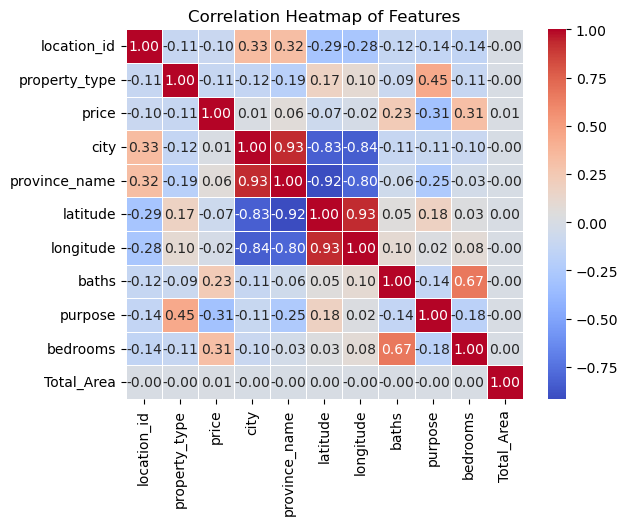

In [214]:
sns.heatmap(house_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

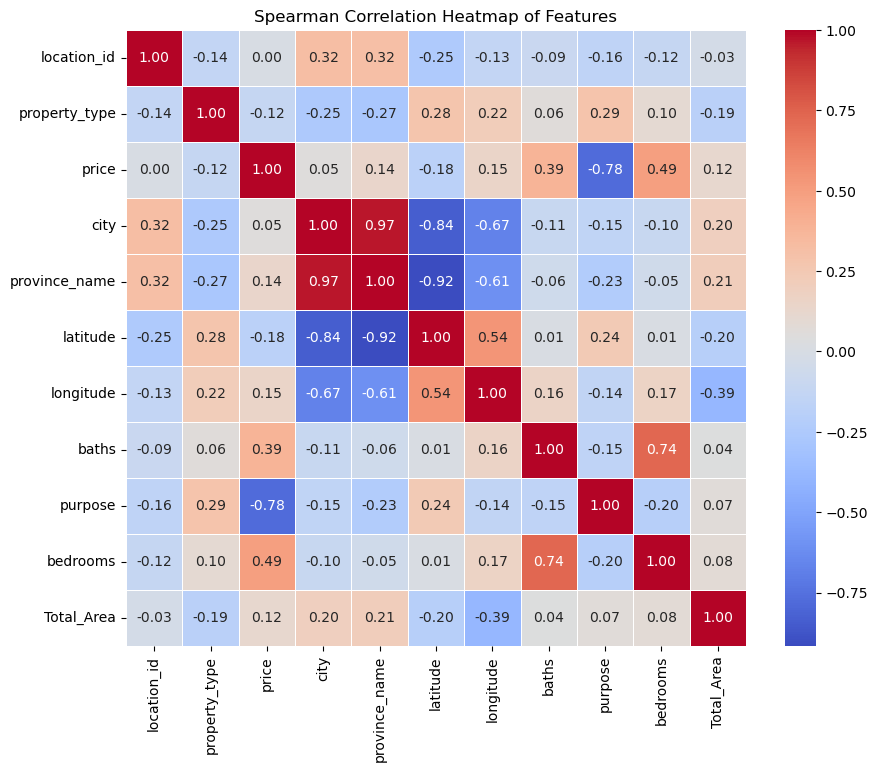

In [215]:
# Calculate Spearman correlation matrix
spearman_corr = house_data.corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap of Features')
plt.show()

array([[<Axes: title={'center': 'location_id'}>,
        <Axes: title={'center': 'property_type'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'province_name'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'Total_Area'}>]], dtype=object)

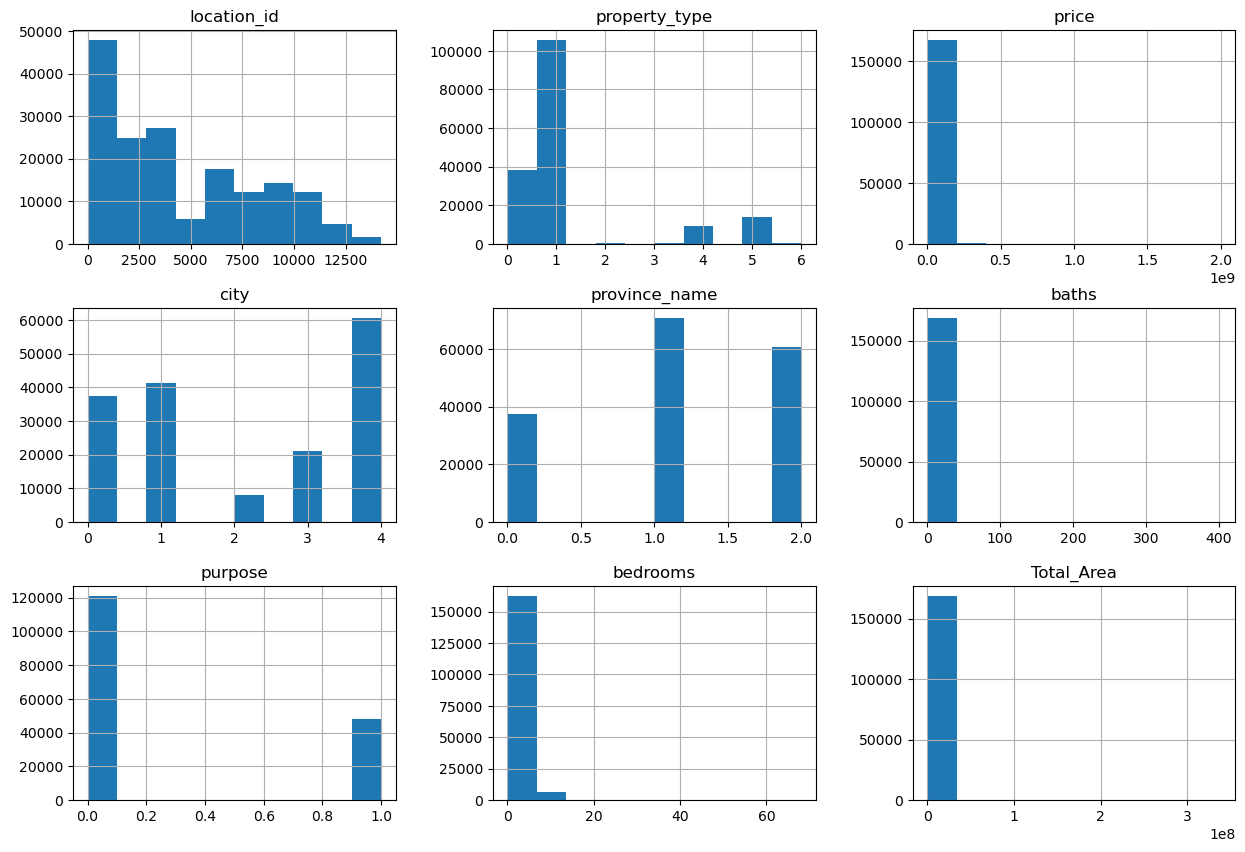

In [73]:
features.hist(figsize = (15,10))

In [209]:
house_sale_lin = house_data[ (house_data['purpose']==1) & (house_data['city']==4)].drop(columns=['location_id','purpose','province_name','city'])
house_sale_lin

,property_type,price,latitude,longitude,baths,bedrooms,Total_Area
208,1,200000,24.821639,67.071691,0,6,65340.000
209,1,230000,24.811562,67.043072,0,6,10890.000
210,1,120000,24.866717,67.089738,4,4,3811.514
211,1,19000,24.949942,67.075441,2,3,13068.048
212,1,43000,24.981857,67.060118,3,6,31308.865
...,...,...,...,...,...,...,...
167585,0,125000,24.791838,67.044668,3,3,29130.857
167586,5,22000,24.794215,67.064610,1,1,1089.004
167816,0,38000,25.012673,67.316063,3,3,185130.000
167817,1,40000,25.009119,67.307179,3,3,1633.506


In [198]:
#house_sale = house_data[ (house_data['purpose']==1) & (house_data['city']==4) & (house_data['property_type']==1) ].drop(columns=['baths','property_type','location_id','purpose','province_name','city'])
house_sale = house_data[ (house_data['purpose']==1) & (house_data['city']==4)].drop(columns=['baths','location_id','purpose','province_name','city'])

house_sale

,property_type,price,latitude,longitude,bedrooms,Total_Area
208,1,200000,24.821639,67.071691,6,65340.000
209,1,230000,24.811562,67.043072,6,10890.000
210,1,120000,24.866717,67.089738,4,3811.514
211,1,19000,24.949942,67.075441,3,13068.048
212,1,43000,24.981857,67.060118,6,31308.865
...,...,...,...,...,...,...
167585,0,125000,24.791838,67.044668,3,29130.857
167586,5,22000,24.794215,67.064610,1,1089.004
167816,0,38000,25.012673,67.316063,3,185130.000
167817,1,40000,25.009119,67.307179,3,1633.506


In [199]:
x = house_sale.drop('price', axis=1)  # Features
y = house_sale['price']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [200]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

In [207]:
model1.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [208]:
model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100
346/346 [==============================] - 3s 4ms/step - loss: 25262190592.0000 - accuracy: 0.0000e+00 - val_loss: 34292471808.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
346/346 [==============================] - 1s 3ms/step - loss: 25235316736.0000 - accuracy: 0.0000e+00 - val_loss: 33065443328.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
346/346 [==============================] - 1s 3ms/step - loss: 25380321280.0000 - accuracy: 0.0000e+00 - val_loss: 33247113216.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
346/346 [==============================] - 1s 3ms/step - loss: 25308889088.0000 - accuracy: 0.0000e+00 - val_loss: 32916191232.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
346/346 [==============================] - 1s 3ms/step - loss: 25089245184.0000 - accuracy: 0.0000e+00 - val_loss: 32808826880.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
346/346 [==============================] - 1s 3ms/step - loss: 25088077824.0000 - accuracy: 0.0000e+00 - val_loss: 33031096320.0000 -

Epoch 49/100
346/346 [==============================] - 1s 3ms/step - loss: 22959253504.0000 - accuracy: 0.0000e+00 - val_loss: 29164539904.0000 - val_accuracy: 0.0000e+00
Epoch 50/100
346/346 [==============================] - 1s 3ms/step - loss: 23197732864.0000 - accuracy: 0.0000e+00 - val_loss: 29574424576.0000 - val_accuracy: 0.0000e+00
Epoch 51/100
346/346 [==============================] - 1s 3ms/step - loss: 23044980736.0000 - accuracy: 0.0000e+00 - val_loss: 30942156800.0000 - val_accuracy: 0.0000e+00
Epoch 52/100
346/346 [==============================] - 1s 3ms/step - loss: 22970109952.0000 - accuracy: 0.0000e+00 - val_loss: 30469156864.0000 - val_accuracy: 0.0000e+00
Epoch 53/100
346/346 [==============================] - 1s 3ms/step - loss: 22564356096.0000 - accuracy: 0.0000e+00 - val_loss: 31182952448.0000 - val_accuracy: 0.0000e+00
Epoch 54/100
346/346 [==============================] - 1s 3ms/step - loss: 21869029376.0000 - accuracy: 0.0000e+00 - val_loss: 29179201536.

In [174]:
mse = model.evaluate(x_test, y_test)
print("Mean Squared Error on Test Set:", mse)

23/23 [==============================] - 0s 2ms/step - loss: 109613776896.0000 - accuracy: 0.0000e+00
Mean Squared Error on Test Set: [109613776896.0, 0.0]


In [187]:
data_sale = house_data[ (house_data['purpose']==1) ].drop(columns=['location_id','latitude','longitude','purpose','province_name'])
data_sale

,property_type,price,city,baths,bedrooms,Total_Area
35,1,110000,0,5,5,5445.000
36,1,600000,0,6,6,10890.000
37,4,33000,0,2,2,2178.008
38,1,45000,0,5,3,65340.000
39,5,12000,0,2,2,1361.255
...,...,...,...,...,...,...
168347,1,400000,0,6,5,70785.000
168348,1,40000,0,0,0,1089.004
168349,1,100000,0,7,5,174240.000
168404,5,25000,2,2,2,3267.012


In [188]:
x = data_sale.drop('price', axis=1)  # Features
y = data_sale['price']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [189]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])

In [190]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [192]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100
1195/1195 [==============================] - 5s 4ms/step - loss: 37134577664.0000 - val_loss: 49665896448.0000
Epoch 2/100
1195/1195 [==============================] - 5s 4ms/step - loss: 36039413760.0000 - val_loss: 48684457984.0000
Epoch 3/100
1195/1195 [==============================] - 5s 4ms/step - loss: 37238296576.0000 - val_loss: 49893965824.0000
Epoch 4/100
1195/1195 [==============================] - 5s 4ms/step - loss: 38332203008.0000 - val_loss: 49221681152.0000
Epoch 5/100
1195/1195 [==============================] - 5s 4ms/step - loss: 41154367488.0000 - val_loss: 51678261248.0000
Epoch 6/100
1195/1195 [==============================] - 5s 4ms/step - loss: 37060866048.0000 - val_loss: 45569396736.0000
Epoch 7/100
1195/1195 [==============================] - 5s 4ms/step - loss: 34855653376.0000 - val_loss: 48848052224.0000
Epoch 8/100
1195/1195 [==============================] - 4s 4ms/step - loss: 38914215936.0000 - val_loss: 48082317312.0000
Epoch 9/100
1195

KeyboardInterrupt: 

In [149]:
mse = model.evaluate(x_test, y_test)
print("Mean Squared Error on Test Set:", mse)

299/299 [==============================] - 1s 2ms/step - loss: 54356262912.0000
Mean Squared Error on Test Set: 54356262912.0
